<h1 Style="color:Maroon;">Initializing</h1>

In [1]:
import tensorflow as tf
import numpy as np
import tensorflow.keras.layers
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn import metrics
from random import choice
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dropout,Dense, Embedding

In [2]:
(x_train, y_train), (x_test, y_test) =mnist = tf.keras.datasets.mnist .load_data()

<h1 Style="color:orange;">Visualization</h1>

In [3]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
x_train[0].shape

(28, 28)

In [5]:
# to plot numbers with different gardients for fun
plot_gradients = ['viridis', 'plasma', 'inferno', 'magma', 'cividis']

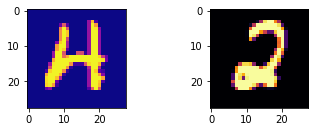

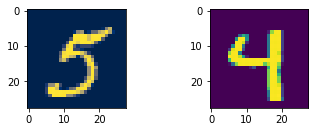

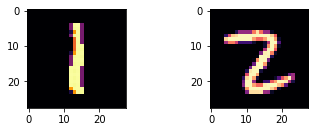

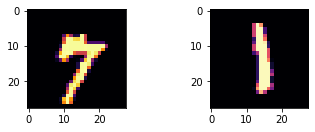

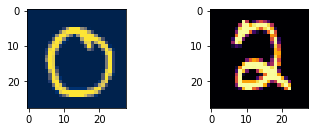

In [6]:
# plotting a couple of numbers randomly
for i in range(5):
    plt.subplot(221)
    plt.imshow(choice(x_train),cmap=plt.get_cmap(choice(plot_gradients)))
    plt.subplot(222)
    plt.imshow(choice(x_train),cmap=plt.get_cmap(choice(plot_gradients)))
    plt.show()

In [7]:
# mormalizing the model
x_train, x_test = x_train/255.0, x_test/255.0

In [8]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [9]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

<h1 Style="color:#8633FF;">Simple RNN Model</h1>

In [10]:
inputs = keras.layers.Input(shape=(28, 28))
Neural_network = keras.layers.SimpleRNN(64)(inputs)
outputs = keras.layers.Dense(10, activation="softmax")(Neural_network)

In [11]:
RNN_model = tf.keras.models.Model(inputs, outputs)
RNN_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                5952      
                                                                 
 dense (Dense)               (None, 10)                650       
                                                                 
Total params: 6,602
Trainable params: 6,602
Non-trainable params: 0
_________________________________________________________________


In [12]:
RNN_model.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

In [13]:
RNN_history = RNN_model.fit(x_train, y_train, epochs=5, validation_split = 0.3,shuffle=True)

Epoch 1/5
1313/1313 [==============================] - 7s 5ms/step - loss: 0.6150 - accuracy: 0.8078 - val_loss: 0.3307 - val_accuracy: 0.9062
Epoch 2/5
1313/1313 [==============================] - 6s 5ms/step - loss: 0.3036 - accuracy: 0.9111 - val_loss: 0.2833 - val_accuracy: 0.9123
Epoch 3/5
1313/1313 [==============================] - 7s 5ms/step - loss: 0.2476 - accuracy: 0.9281 - val_loss: 0.2367 - val_accuracy: 0.9325
Epoch 4/5
1313/1313 [==============================] - 7s 5ms/step - loss: 0.2142 - accuracy: 0.9387 - val_loss: 0.1990 - val_accuracy: 0.9420
Epoch 5/5
1313/1313 [==============================] - 8s 6ms/step - loss: 0.1979 - accuracy: 0.9415 - val_loss: 0.2359 - val_accuracy: 0.9348


<h1 Style="color:purple;">lSTM Model</h1>

In [14]:
LSTM_model = Sequential()
LSTM_model.add(LSTM(64, input_shape=(28,28)))
LSTM_model.add(Dense(10, activation="softmax"))
LSTM_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                23808     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 24,458
Trainable params: 24,458
Non-trainable params: 0
_________________________________________________________________


In [15]:
LSTM_model.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

In [16]:
LSTM_history = LSTM_model.fit(x_train, y_train, epochs=5, validation_split = 0.3,shuffle=True)

Epoch 1/5
1313/1313 [==============================] - 20s 14ms/step - loss: 0.4991 - accuracy: 0.8432 - val_loss: 0.2209 - val_accuracy: 0.9334
Epoch 2/5
1313/1313 [==============================] - 17s 13ms/step - loss: 0.1669 - accuracy: 0.9498 - val_loss: 0.1375 - val_accuracy: 0.9593
Epoch 3/5
1313/1313 [==============================] - 21s 16ms/step - loss: 0.1141 - accuracy: 0.9663 - val_loss: 0.1012 - val_accuracy: 0.9704
Epoch 4/5
1313/1313 [==============================] - 20s 16ms/step - loss: 0.0895 - accuracy: 0.9737 - val_loss: 0.1166 - val_accuracy: 0.9666
Epoch 5/5
1313/1313 [==============================] - 19s 14ms/step - loss: 0.0742 - accuracy: 0.9778 - val_loss: 0.0831 - val_accuracy: 0.9743


In [17]:
RNN_model.evaluate(x_test, y_test)
print("\n")
LSTM_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2249 - accuracy: 0.9358


313/313 [==============================] - 2s 7ms/step - loss: 0.0802 - accuracy: 0.9743


[0.08021003752946854, 0.9743000268936157]

<h4 style="color:red;">We get higher accuracy from using LSTM presumably due to the vanishing gradient problem</h4>

<h1 Style="color:blue;">Graphs</h1>

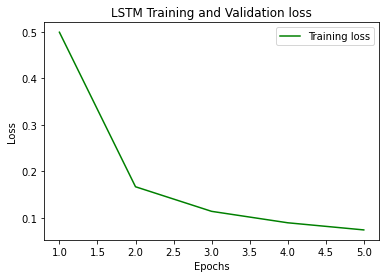

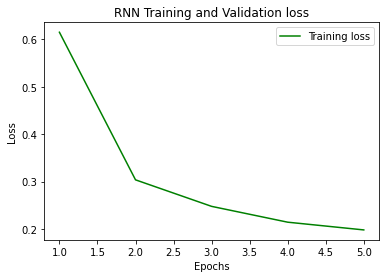

In [18]:
loss_train = LSTM_history.history['loss']
epochs = range(1,6)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.title('LSTM Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

loss_train = RNN_history.history['loss']
epochs = range(1,6)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.title('RNN Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

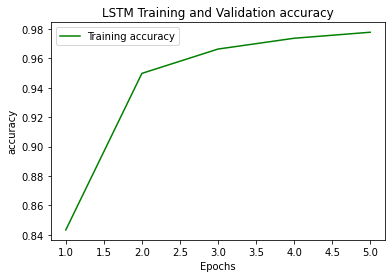

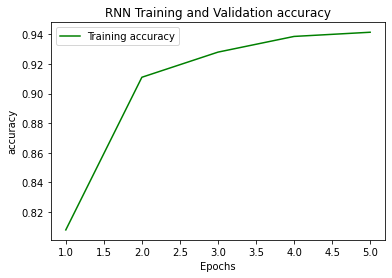

In [19]:
loss_train = LSTM_history.history['accuracy']
epochs = range(1,6)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.title('LSTM Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

loss_train = RNN_history.history['accuracy']
epochs = range(1,6)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.title('RNN Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

<h1 style="color:green;">Predict</h1>

In [20]:
test = x_test.reshape(x_test.shape[0],28,28, 1)

In [21]:
predict = LSTM_model.predict(test)
predict[0]

array([3.5219757e-05, 3.7376572e-05, 1.2242385e-04, 2.5574083e-04,
       1.7622722e-05, 1.4146002e-05, 3.6674584e-07, 9.9922884e-01,
       7.9986376e-06, 2.8025158e-04], dtype=float32)

In [22]:
#argmax will return the maximum value index and find the value of it 
results = np.argmax(predict,axis =1)

In [23]:
# checking that answer to our predection
results[69]

0

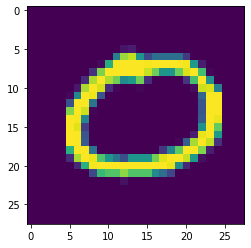

In [24]:
plt.imshow(x_test[69])

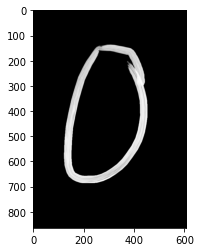

In [25]:
# Predicting on untested image using opencv
import cv2
img =cv2.imread('0.png')
plt.imshow(img)

In [26]:
resized =cv2.resize(img,(28,28),interpolation =cv2.INTER_AREA)
resized.shape
# the shape is not identical to our model

(28, 28, 3)

In [27]:
gray =cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
resized =cv2.resize(gray,(28,28),interpolation =cv2.INTER_AREA)
resized.shape

(28, 28)

In [28]:
new_img =resized / 255
new_img= np.array(new_img).reshape(-1,28,28,1)


In [29]:
predicions =LSTM_model.predict(new_img)
print (np.argmax(predicions))

0
